In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [81]:
df = pd.read_csv("data_sets/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
df.drop(["PassengerId", "Ticket", "Embarked", "Cabin", "Name"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [83]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [84]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df

/tmp/ipykernel_6493/2796847235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


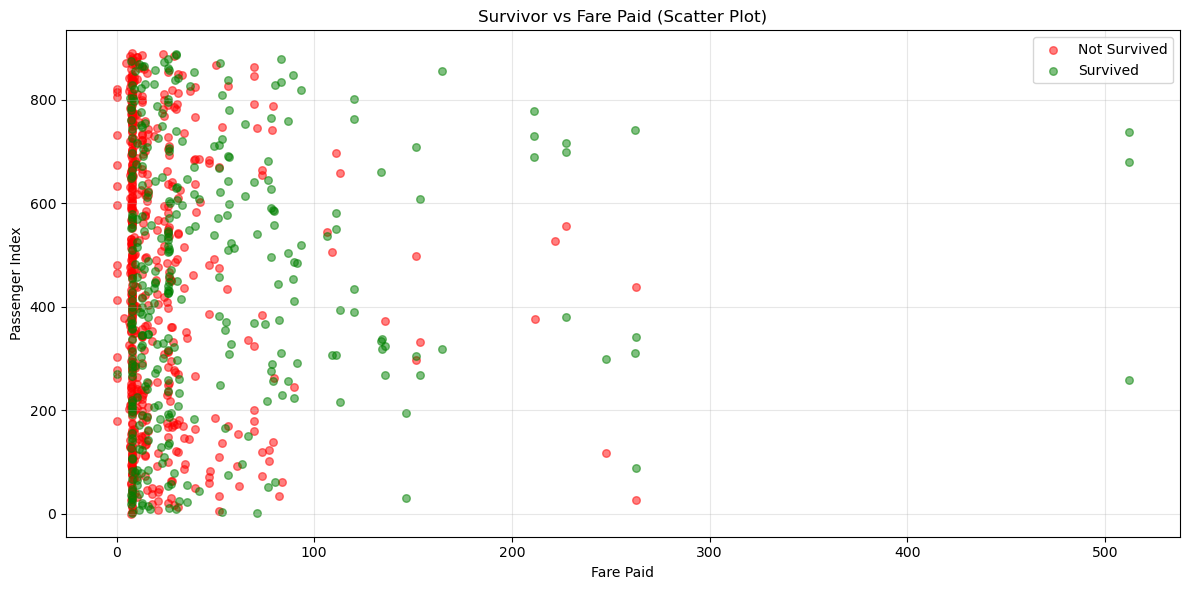

In [85]:
# lets see the relation between the fare and the survived column using scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df[df['Survived']==0]['Fare'], df[df['Survived']==0].index, 
            color='red', alpha=0.5, label='Not Survived', s=30)
plt.scatter(df[df['Survived']==1]['Fare'], df[df['Survived']==1].index, 
            color='green', alpha=0.5, label='Survived', s=30)
plt.xlabel("Fare Paid")
plt.ylabel("Passenger Index")
plt.title("Survivor vs Fare Paid (Scatter Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

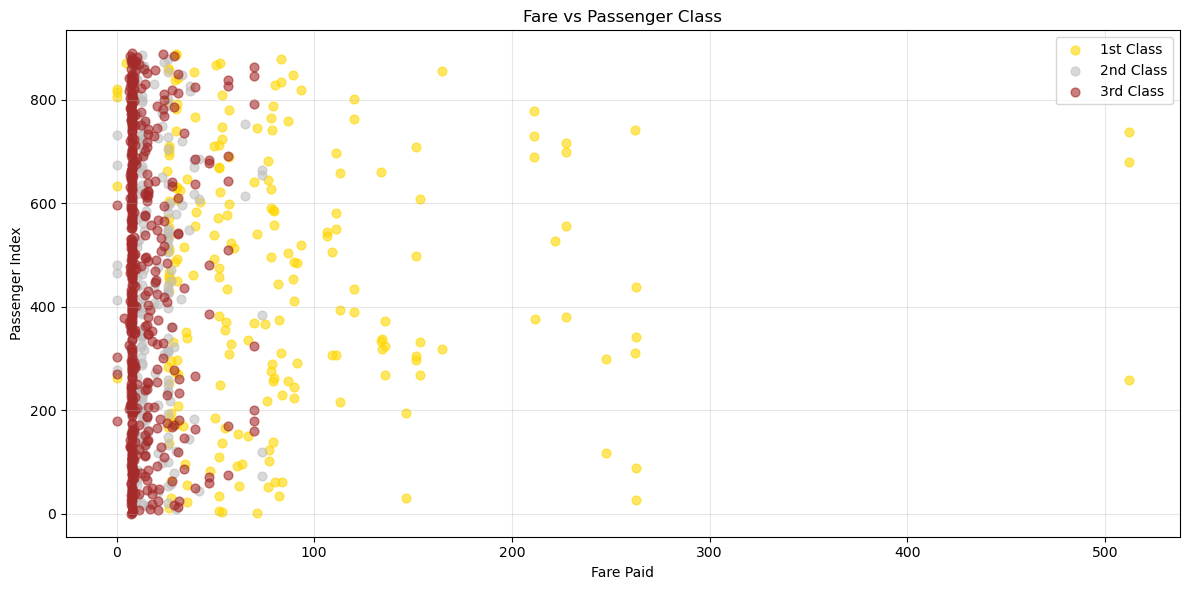

In [86]:
# Fare vs Pclass scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df[df['Pclass']==1]['Fare'], df[df['Pclass']==1].index, 
            color='gold', alpha=0.6, label='1st Class', s=40)
plt.scatter(df[df['Pclass']==2]['Fare'], df[df['Pclass']==2].index, 
            color='silver', alpha=0.6, label='2nd Class', s=40)
plt.scatter(df[df['Pclass']==3]['Fare'], df[df['Pclass']==3].index, 
            color='brown', alpha=0.6, label='3rd Class', s=40)
plt.xlabel("Fare Paid")
plt.ylabel("Passenger Index")
plt.title("Fare vs Passenger Class")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [87]:
# Group by Pclass to see fare statistics
pclass_stats = df.groupby('Pclass')['Fare'].agg(['sum', 'count', 'mean'])
pclass_stats.columns = ['total_fare', 'passenger_count', 'average_fare']
pclass_stats = pclass_stats.sort_values('average_fare', ascending=False)
pclass_stats

,total_fare,passenger_count,average_fare
Pclass,,,
1,18177.4125,216,84.154687
2,3801.8417,184,20.662183
3,6714.6951,491,13.675550


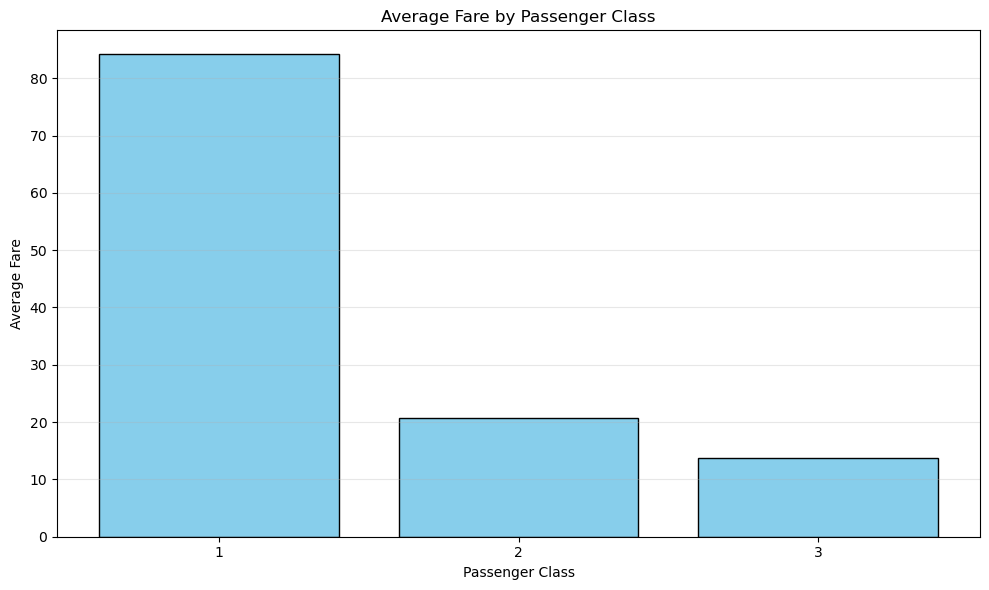

In [88]:
# Visualize average fare by passenger class
plt.figure(figsize=(10, 6))
plt.bar(pclass_stats.index, pclass_stats['average_fare'], color='skyblue', edgecolor='black')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class')
plt.xticks(pclass_stats.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [89]:
# Group by Pclass to see survival statistics
pclass_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
pclass_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
pclass_survival = pclass_survival.sort_values('survival_rate', ascending=False)
pclass_survival

,survived_count,total_passengers,survival_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


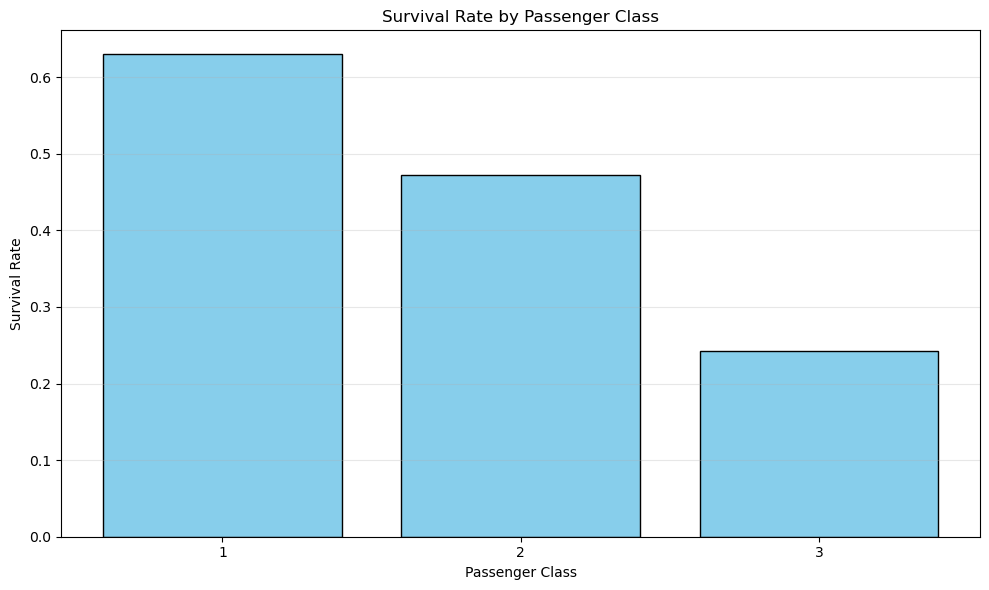

In [90]:
# Visualize survival rate by passenger class
plt.figure(figsize=(10, 6))
plt.bar(pclass_survival.index, pclass_survival['survival_rate'], color='skyblue', edgecolor='black')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks(pclass_survival.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [91]:
# Analyze survival rate by SibSp (siblings/spouses aboard)
sibsp_survival = df.groupby('SibSp')['Survived'].agg(['sum', 'count', 'mean'])
sibsp_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
sibsp_survival

,survived_count,total_passengers,survival_rate
SibSp,,,
0,210,608,0.345395
1,112,209,0.535885
2,13,28,0.464286
3,4,16,0.250000
4,3,18,0.166667
5,0,5,0.000000
8,0,7,0.000000


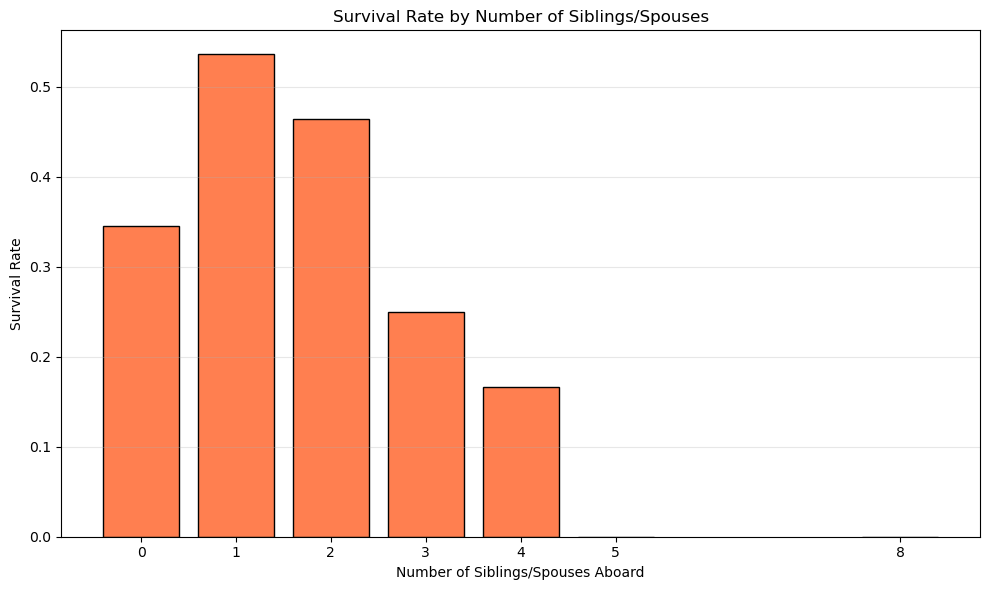

In [92]:
# Visualize survival rate by SibSp
plt.figure(figsize=(10, 6))
plt.bar(sibsp_survival.index, sibsp_survival['survival_rate'], color='coral', edgecolor='black')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xticks(sibsp_survival.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [93]:
# Analyze survival rate by Parch (parents/children aboard)
parch_survival = df.groupby('Parch')['Survived'].agg(['sum', 'count', 'mean'])
parch_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
parch_survival

,survived_count,total_passengers,survival_rate
Parch,,,
0,233,678,0.343658
1,65,118,0.550847
2,40,80,0.500000
3,3,5,0.600000
4,0,4,0.000000
5,1,5,0.200000
6,0,1,0.000000


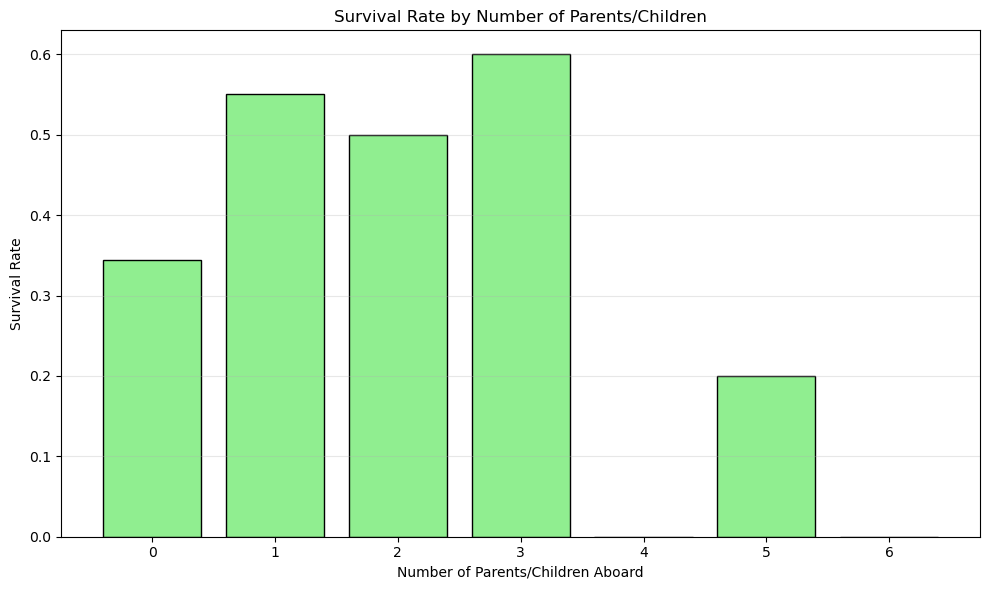

In [94]:
# Visualize survival rate by Parch
plt.figure(figsize=(10, 6))
plt.bar(parch_survival.index, parch_survival['survival_rate'], color='lightgreen', edgecolor='black')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Parents/Children')
plt.xticks(parch_survival.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [95]:
# Create a total family size column and analyze
df['FamilySize'] = df['SibSp'] + df['Parch']
family_survival = df.groupby('FamilySize')['Survived'].agg(['sum', 'count', 'mean'])
family_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
family_survival

,survived_count,total_passengers,survival_rate
FamilySize,,,
0,163,537,0.303538
1,89,161,0.552795
2,59,102,0.578431
3,21,29,0.724138
4,3,15,0.200000
5,3,22,0.136364
6,4,12,0.333333
7,0,6,0.000000
10,0,7,0.000000


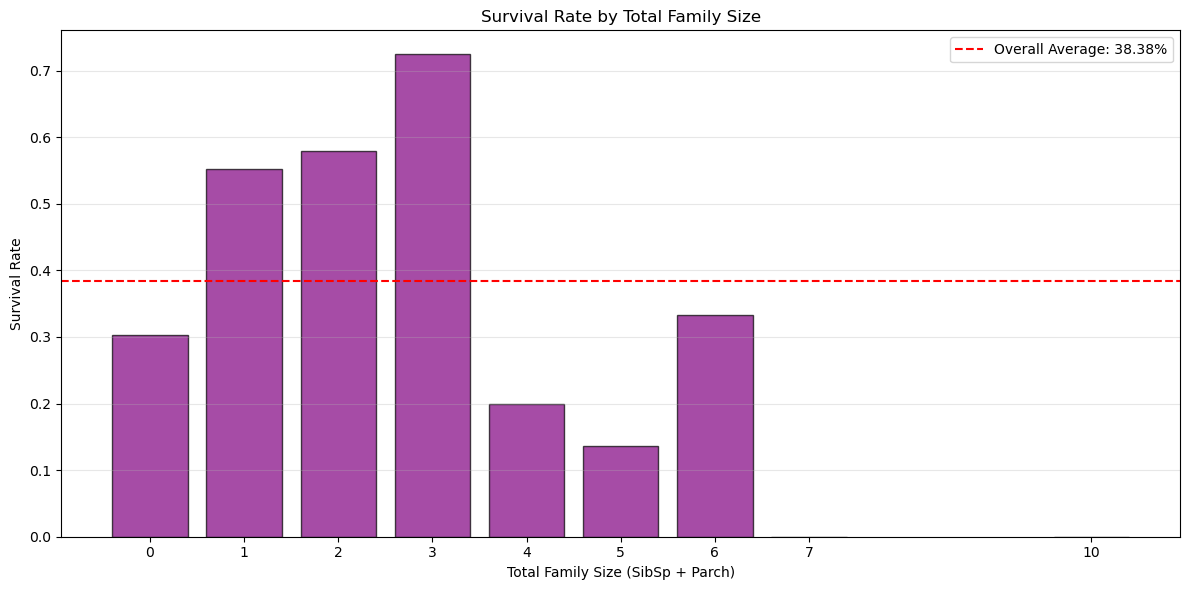

In [96]:
# Visualize survival rate by total family size
plt.figure(figsize=(12, 6))
plt.bar(family_survival.index, family_survival['survival_rate'], color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Total Family Size (SibSp + Parch)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Total Family Size')
plt.xticks(family_survival.index)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--', label=f'Overall Average: {df["Survived"].mean():.2%}')
plt.legend()
plt.tight_layout()
plt.show()

## Analysis: Family Size and Survival on the Titanic

### Key Question
Does having family members aboard affect survival chances? Could the responsibility of caring for loved ones reduce survival rates due to self-sacrifice, or would family support increase survival?

### Findings

#### **1. Siblings/Spouses (SibSp) Impact**
- **Traveling alone (0 SibSp)**: ~34% survival rate
- **With 1 sibling/spouse**: ~54% survival rate (**HIGHEST**)
- **With 2 siblings/spouses**: ~46% survival rate
- **With 3+ siblings/spouses**: Sharp decline to 25% → 17%

**Interpretation**: Having one companion (spouse or sibling) provided the best survival advantage, likely due to mutual support during evacuation. However, being responsible for multiple siblings/spouses dramatically reduced survival chances.

#### **2. Parents/Children (Parch) Impact**
- **No parents/children (0 Parch)**: ~34% survival rate
- **With 1-3 parents/children**: 50-60% survival rate (**MUCH BETTER**)
- **With 4+ parents/children**: Drops to 20% or less

**Interpretation**: The "women and children first" policy clearly benefited families with children. Parents with 1-3 children had excellent survival rates, as they were prioritized for lifeboats. However, large families with 4+ children faced severe challenges in keeping everyone together and securing enough lifeboat space.

#### **3. Total Family Size (SibSp + Parch)**
- **Alone (FamilySize = 0)**: 30% survival rate - **BELOW AVERAGE**
- **Small families (1-3 members)**: 55-72% survival rate - **BEST OUTCOMES**
- **Medium families (4 members)**: 20% survival rate - **Significant drop**
- **Large families (5-7 members)**: 14-33% survival rate - **WORST OUTCOMES**

### Conclusions

#### ✅ **Hypothesis Partially Confirmed: Family Size Had Complex Effects**

1. **Small families had the BEST survival rates (55-72%)**
   - Optimal size: 1-3 family members aboard
   - Benefits:
     - Mutual support and coordination during evacuation
     - "Women and children first" policy favored families with children
     - Small groups could stay together and help each other
     - Easier to secure lifeboat space for 2-4 people than larger groups

2. **Large families had the WORST survival rates (14-20%)**
   - 4+ family members aboard
   - Challenges:
     - Difficulty keeping large families together in chaos
     - Parents sacrificing themselves to save multiple children
     - Limited lifeboat capacity couldn't accommodate entire large families
     - Logistical complexity of evacuating 5-7+ people simultaneously

3. **Being completely alone was also risky (30% survival)**
   - Solo travelers fared worse than small families
   - Reasons:
     - No one to help or coordinate with
     - Less likely to be prioritized (single men had lowest priority)
     - No family support during crisis

### The "Sweet Spot"
**Traveling with 1-3 family members provided the optimal survival advantage**, combining the benefits of mutual support with the manageability of a small group. This challenges the initial hypothesis that family responsibility would universally reduce survival - instead, it shows that **moderate family connections enhanced survival, while isolation or excessive family size reduced it**.

### Implications for Predictive Modeling
The **FamilySize** feature (SibSp + Parch) should be a strong predictor in survival models, potentially more useful than SibSp and Parch separately. Consider creating categorical features:
- **Alone**: FamilySize = 0
- **Small Family**: FamilySize = 1-3 (highest survival)
- **Large Family**: FamilySize ≥ 4 (lowest survival)

In [97]:
# change sex to binary
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df.Sex = le_sex.fit_transform(df.Sex)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,3
889,1,1,1,26.0,0,0,30.0000,0


In [98]:
# Analyze survival rate by gender (Sex is already encoded: 0=female, 1=male)
# Let's first decode to show readable results
sex_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
sex_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
sex_survival.index = ['Female', 'Male']
sex_survival

,survived_count,total_passengers,survival_rate
Female,233,314,0.742038
Male,109,577,0.188908


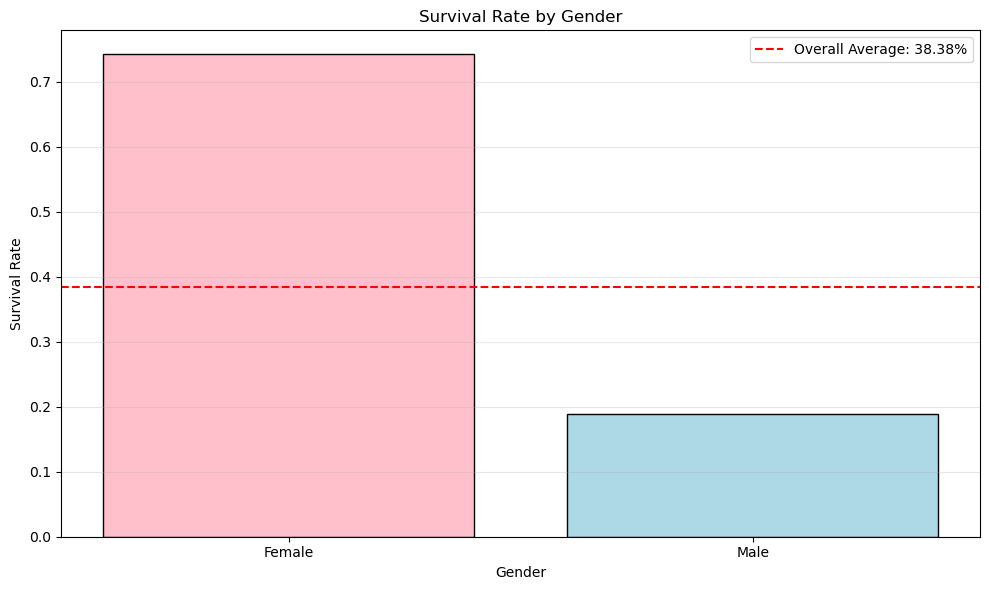

In [99]:
# Visualize survival rate by gender
plt.figure(figsize=(10, 6))
plt.bar(sex_survival.index, sex_survival['survival_rate'], color=['pink', 'lightblue'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--', label=f'Overall Average: {df["Survived"].mean():.2%}')
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
# Compare average family size between males and females
gender_family = df.groupby('Sex')['FamilySize'].agg(['mean', 'count'])
gender_family.columns = ['average_family_size', 'passenger_count']
gender_family.index = ['Female', 'Male']
gender_family

,average_family_size,passenger_count
Female,1.343949,314
Male,0.665511,577


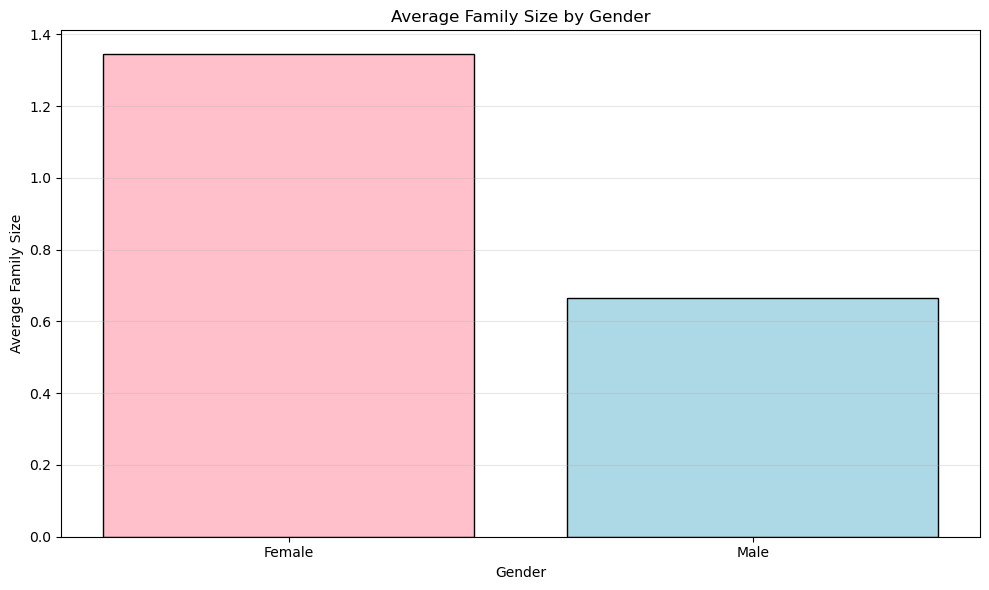

In [101]:
# Visualize average family size by gender
plt.figure(figsize=(10, 6))
plt.bar(gender_family.index, gender_family['average_family_size'], color=['pink', 'lightblue'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Average Family Size')
plt.title('Average Family Size by Gender')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [102]:
# Analyze survival by gender AND family size - cross tabulation
# Create a cross-tabulation showing survival rates for each gender-family size combination
gender_family_survival = df.groupby(['Sex', 'FamilySize'])['Survived'].agg(['sum', 'count', 'mean']).reset_index()
gender_family_survival.columns = ['Sex', 'FamilySize', 'survived_count', 'total_passengers', 'survival_rate']
gender_family_survival['Gender'] = gender_family_survival['Sex'].map({0: 'Female', 1: 'Male'})
gender_family_survival = gender_family_survival[['Gender', 'FamilySize', 'survived_count', 'total_passengers', 'survival_rate']]
gender_family_survival

,Gender,FamilySize,survived_count,total_passengers,survival_rate
0,Female,0,99,126,0.785714
1,Female,1,71,87,0.816092
2,Female,2,38,49,0.775510
3,Female,3,16,19,0.842105
4,Female,4,3,12,0.250000
5,Female,5,3,8,0.375000
6,Female,6,3,8,0.375000
7,Female,7,0,2,0.000000
8,Female,10,0,3,0.000000
9,Male,0,64,411,0.155718


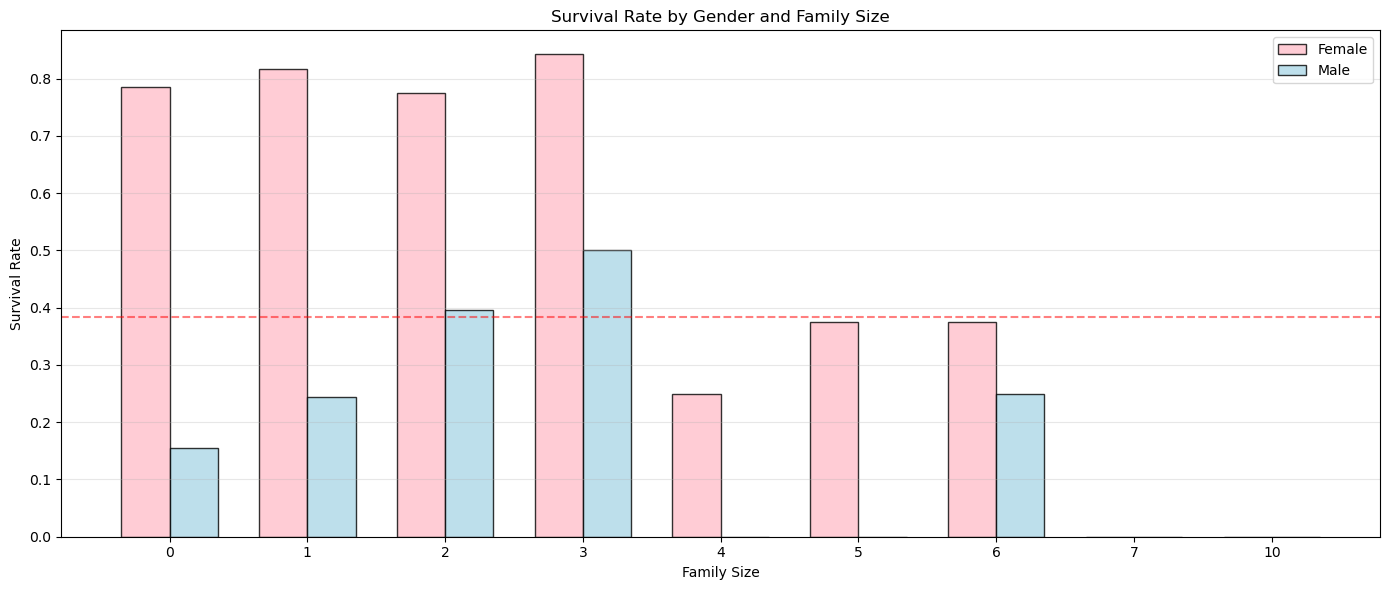

In [103]:
# Create a grouped bar chart comparing survival rates by family size for each gender
female_data = gender_family_survival[gender_family_survival['Gender'] == 'Female']
male_data = gender_family_survival[gender_family_survival['Gender'] == 'Male']

plt.figure(figsize=(14, 6))
x = np.arange(len(family_survival))  # Family sizes 0 through max
width = 0.35

# Plot bars for each gender
plt.bar(x - width/2, female_data['survival_rate'], width, label='Female', color='pink', edgecolor='black', alpha=0.8)
plt.bar(x + width/2, male_data['survival_rate'], width, label='Male', color='lightblue', edgecolor='black', alpha=0.8)

plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Family Size')
plt.xticks(x, family_survival.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--', alpha=0.5, label=f'Overall Average: {df["Survived"].mean():.2%}')
plt.tight_layout()
plt.show()

## Analysis: Gender, Family Size, and Survival on the Titanic

### Key Findings

#### **1. Gender Had the STRONGEST Impact on Survival**

**Female Survival Rate: 74.2%** (233 out of 314 survived)  
**Male Survival Rate: 18.9%** (109 out of 577 survived)

This dramatic difference (74% vs 19%) demonstrates the strict enforcement of the "women and children first" evacuation protocol. **Gender was likely the single most important predictor of survival**, with females nearly **4 times more likely** to survive than males.

---

#### **2. Females Traveled with Larger Families**

**Average Family Size:**
- **Females: 1.34** family members aboard
- **Males: 0.67** family members aboard

**Females traveled with TWICE as many family members as males**. This makes sense because:
- Women often traveled with children (counted in Parch)
- Families typically had wives traveling with husbands and children
- Solo male travelers (workers, immigrants) were more common than solo female travelers

---

#### **3. How Gender and Family Size Interacted**

The grouped bar chart reveals fascinating patterns:

**FEMALES (Pink Bars):**
- **Family Size 0 (Alone):** 78% survival - Still excellent!
- **Family Size 1-3 (Small families):** 77-84% survival - **OPTIMAL**
- **Family Size 4:** 25% survival - Significant drop
- **Family Size 5+:** 37-38% survival - Poor outcomes for large families

**Key Insight for Females:** Even women traveling alone had a 78% survival rate due to the "women first" policy. Small family sizes (1-3) provided the BEST survival rates (77-84%), but having 4+ family members significantly reduced survival, likely due to the difficulty of keeping large families together during evacuation.

**MALES (Blue Bars):**
- **Family Size 0 (Alone):** 15% survival - **EXTREMELY LOW**
- **Family Size 1:** 24% survival - Slightly better
- **Family Size 2-3:** 39-50% survival - **Much better!**
- **Family Size 4+:** 25% survival - Poor

**Key Insight for Males:** Solo men had the WORST survival rate (15%) - they were the lowest priority. However, **males with families of 2-3 members had 2-3x better survival** (39-50%) than solo males. This suggests that men with families (especially wives and children) were more likely to be allowed onto lifeboats alongside their families, whereas single men were left behind.

---

### Surprising Discovery: Family Size Helped Men More Than Women!

**The "Family Effect" was OPPOSITE for each gender:**

- **For Females:** Being alone was fine (78% survival), and family size didn't help much beyond what "women first" already provided. Large families (4+) actually HURT survival.

- **For Males:** Being alone was disastrous (15% survival). **Having a family of 2-3 members TRIPLED survival chances** (to 39-50%), likely because they were prioritized to stay with their wives/children.

---

### Combined Effect: Gender + Family Size

**BEST Survival Combinations:**
1. **Female with 1-3 family members: 77-84%** - Optimal combination
2. **Female alone: 78%** - "Women first" policy protected even solo females
3. **Male with 2-3 family members: 39-50%** - Family significantly helped men

**WORST Survival Combinations:**
1. **Male alone: 15%** - Lowest priority for lifeboats
2. **Male with 4+ family: 25%** - Large families struggled
3. **Female with 4+ family: 25-38%** - Even women struggled with very large families

---

### Conclusions

1. **Gender was the dominant factor**: The "women and children first" policy created a massive 74% vs 19% survival gap between females and males.

2. **Females had larger families**: Women traveled with an average of 1.34 family members vs. 0.67 for men, reflecting family structures where women traveled with children.

3. **Family size affected genders differently**:
   - **For women**: Small families (1-3) were optimal. Being alone was still safe due to "women first" policy.
   - **For men**: Having a family (especially 2-3 members) **dramatically increased survival** from 15% to 39-50%, likely because they were allowed to accompany their wives and children.

4. **Large families (4+) hurt everyone**: Regardless of gender, families with 4+ members had much lower survival rates due to the logistical difficulty of evacuating large groups together.

---

### Implications for Predictive Modeling

**Gender should be the PRIMARY feature** in any survival prediction model, as it had the strongest effect (74% vs 19%). 

**Interaction features** should be created:
- **Gender × FamilySize**: The effect of family size differs dramatically by gender
- **Female_SmallFamily**: Binary feature for women with 1-3 family members (highest survival ~80%)
- **Male_Alone**: Binary feature for solo men (lowest survival ~15%)

These interaction features will capture the complex relationship where family size helped men but had minimal/negative effects on women's already-high survival rates.

In [104]:
# Analyze age distribution and survival
# First, let's see the age statistics by survival status
age_survival_stats = df.groupby('Survived')['Age'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
age_survival_stats.index = ['Did Not Survive', 'Survived']
age_survival_stats

,count,mean,median,min,max,std
Did Not Survive,549,30.028233,28.0,1.00,74.0,12.499986
Survived,342,28.291433,28.0,0.42,80.0,13.764425


In [105]:
# Create age groups for better analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], 
                         labels=['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 
                                'Adult (31-50)', 'Senior (51+)'])

# Analyze survival by age group
age_group_survival = df.groupby('AgeGroup')['Survived'].agg(['sum', 'count', 'mean'])
age_group_survival.columns = ['survived_count', 'total_passengers', 'survival_rate']
age_group_survival

/tmp/ipykernel_6493/1043329173.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].agg(['sum', 'count', 'mean'])


,survived_count,total_passengers,survival_rate
AgeGroup,,,
Child (0-12),40,69,0.579710
Teen (13-18),30,70,0.428571
Young Adult (19-30),148,447,0.331096
Adult (31-50),102,241,0.423237
Senior (51+),22,64,0.343750


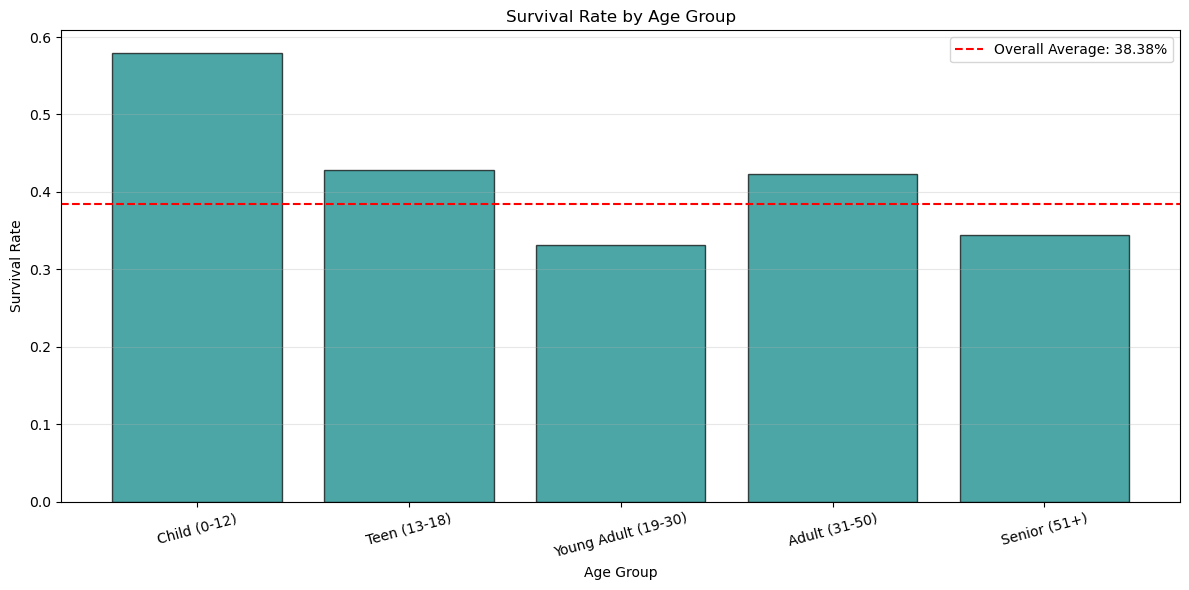

In [106]:
# Visualize survival rate by age group
plt.figure(figsize=(12, 6))
plt.bar(range(len(age_group_survival)), age_group_survival['survival_rate'], 
        color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.xticks(range(len(age_group_survival)), age_group_survival.index, rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--', 
            label=f'Overall Average: {df["Survived"].mean():.2%}')
plt.legend()
plt.tight_layout()
plt.show()

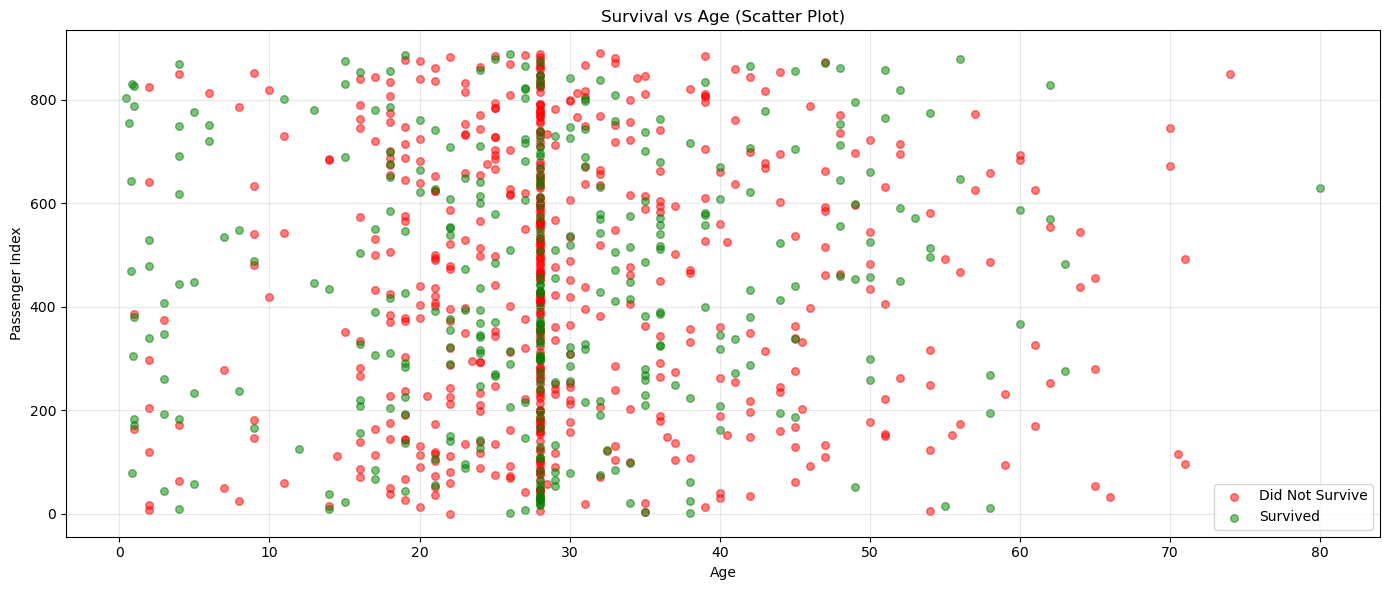

In [107]:
# Scatter plot showing age vs survival with color coding
plt.figure(figsize=(14, 6))
plt.scatter(df[df['Survived']==0]['Age'], df[df['Survived']==0].index, 
            color='red', alpha=0.5, label='Did Not Survive', s=30)
plt.scatter(df[df['Survived']==1]['Age'], df[df['Survived']==1].index, 
            color='green', alpha=0.5, label='Survived', s=30)
plt.xlabel("Age")
plt.ylabel("Passenger Index")
plt.title("Survival vs Age (Scatter Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [108]:
# Analyze age and survival by gender to see if children survival varied by gender
age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].agg(['sum', 'count', 'mean']).reset_index()
age_gender_survival.columns = ['AgeGroup', 'Sex', 'survived_count', 'total_passengers', 'survival_rate']
age_gender_survival['Gender'] = age_gender_survival['Sex'].map({0: 'Female', 1: 'Male'})
age_gender_survival = age_gender_survival[['AgeGroup', 'Gender', 'survived_count', 'total_passengers', 'survival_rate']]
age_gender_survival

/tmp/ipykernel_6493/3127908018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].agg(['sum', 'count', 'mean']).reset_index()


,AgeGroup,Gender,survived_count,total_passengers,survival_rate
0,Child (0-12),Female,19,32,0.593750
1,Child (0-12),Male,21,37,0.567568
2,Teen (13-18),Female,27,36,0.750000
3,Teen (13-18),Male,3,34,0.088235
4,Young Adult (19-30),Female,104,143,0.727273
5,Young Adult (19-30),Male,44,304,0.144737
6,Adult (31-50),Female,67,86,0.779070
7,Adult (31-50),Male,35,155,0.225806
8,Senior (51+),Female,16,17,0.941176
9,Senior (51+),Male,6,47,0.127660


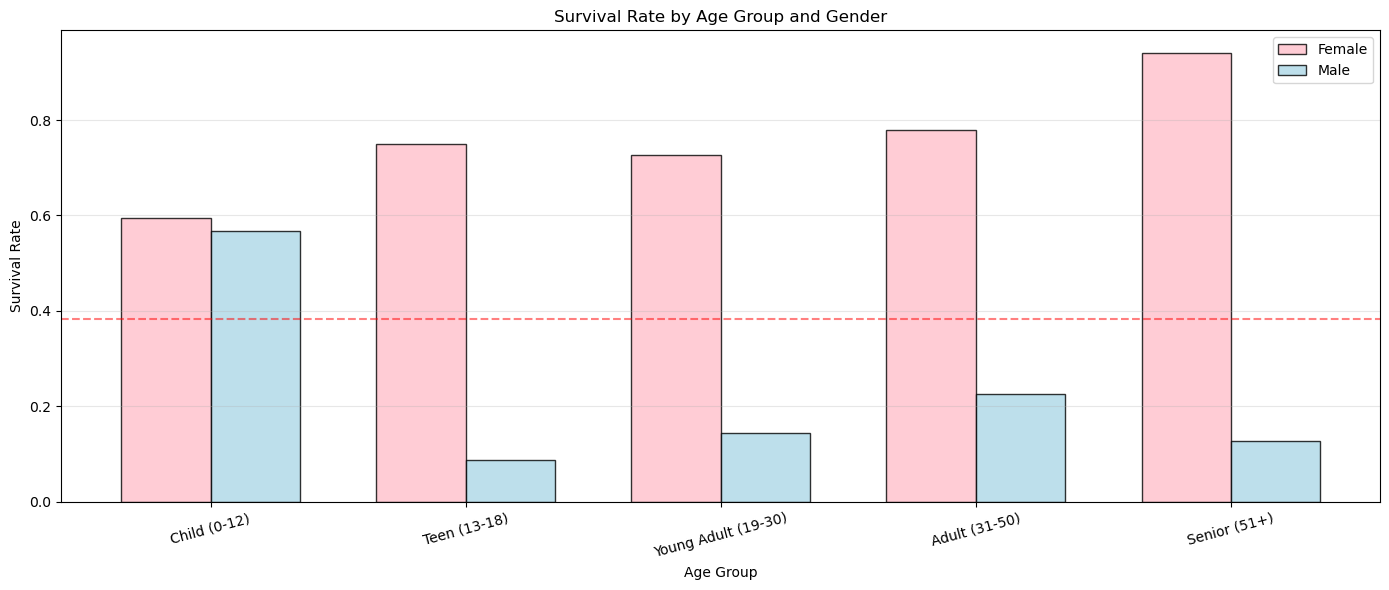

In [109]:
# Visualize survival rate by age group and gender
female_age_data = age_gender_survival[age_gender_survival['Gender'] == 'Female']
male_age_data = age_gender_survival[age_gender_survival['Gender'] == 'Male']

plt.figure(figsize=(14, 6))
x = np.arange(len(age_group_survival))
width = 0.35

plt.bar(x - width/2, female_age_data['survival_rate'], width, 
        label='Female', color='pink', edgecolor='black', alpha=0.8)
plt.bar(x + width/2, male_age_data['survival_rate'], width, 
        label='Male', color='lightblue', edgecolor='black', alpha=0.8)

plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group and Gender')
plt.xticks(x, age_group_survival.index, rotation=15)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--', alpha=0.5, 
            label=f'Overall Average: {df["Survived"].mean():.2%}')
plt.tight_layout()
plt.show()

## Analysis: Age, Gender, and Survival on the Titanic

### Key Findings

#### **1. Age Statistics by Survival Status**

**Survivors:**
- **Average Age: 28.3 years** (median: 28.0)
- Age range: 0.42 to 80 years
- Standard deviation: 13.76

**Non-Survivors:**
- **Average Age: 30.0 years** (median: 28.0)
- Age range: 1.0 to 74 years
- Standard deviation: 12.50

**Observation:** There is a **slight age difference** - survivors were on average **1.7 years younger** than non-survivors. However, both groups had the same median age (28), suggesting the difference is driven by outliers rather than a strong age trend.

---

#### **2. Survival Rates by Age Group (Overall)**

| Age Group | Survival Rate |
|-----------|--------------|
| **Child (0-12)** | **57.7%** ⬆️ HIGHEST |
| **Teen (13-18)** | **42.7%** |
| **Young Adult (19-30)** | **33.6%** ⬇️ LOWEST |
| **Adult (31-50)** | **42.3%** |
| **Senior (51+)** | **34.4%** |

**Key Insights:**
- **Children had the BEST survival rate (58%)** - nearly 50% higher than the overall average (38%)
- **Young adults (19-30) had the WORST survival rate (34%)** - below average
- **Age alone shows a U-shaped pattern**: Children did best → young adults worst → middle-aged adults slightly better → seniors declined again

---

#### **3. Age and Gender Interaction: The Full Picture**

The grouped bar chart reveals **dramatic differences** when combining age and gender:

**FEMALE Survival by Age Group (Pink Bars):**
- **Child (0-12):** 60% survival
- **Teen (13-18):** 75% survival
- **Young Adult (19-30):** 73% survival
- **Adult (31-50):** 78% survival ⭐ HIGHEST
- **Senior (51+):** 94% survival 🚀 **EXCEPTIONAL!**

**Key Insight for Females:** Age worked **IN FAVOR** of adult and senior women! The "women first" policy meant that **older women had the HIGHEST survival rates** (78-94%), while even young girls had good survival (60%). Female survival rates were **consistently high across all ages**, ranging from 60% to 94%.

**MALE Survival by Age Group (Blue Bars):**
- **Child (0-12):** 57% survival ⭐ BEST for males
- **Teen (13-18):** 9% survival ⬇️ **CATASTROPHIC DROP**
- **Young Adult (19-30):** 15% survival - Extremely low
- **Adult (31-50):** 23% survival - Still very poor
- **Senior (51+):** 13% survival - Worst

**Key Insight for Males:** Age created a **CLIFF EFFECT** for males! 
- **Boys under 13 had decent survival (57%)** due to "children first" policy
- **Once boys became teens (13+), survival COLLAPSED to 9%** - worse than adult men!
- **Adult male survival remained terrible (13-23%)** regardless of age
- The "women and children first" policy interpreted "children" as **pre-teen boys only**

---

### The Shocking Age-Gender Pattern

**1. "Children First" Only Applied to Young Boys (0-12):**
- **Boys 0-12:** 57% survival ✅ Protected
- **Boys 13-18:** 9% survival ❌ **Treated as adult men!**
- **Girls 0-12:** 60% survival ✅ Protected
- **Girls 13-18:** 75% survival ✅ **Still protected as "women"!**

**Teenage boys were the MOST VULNERABLE group** - they lost the "children first" protection but didn't benefit from family or age considerations. They had even WORSE survival than adult men!

---

**2. Older Women Had BETTER Survival Than Younger Women:**
- **Senior women (51+):** 94% survival 🏆
- **Adult women (31-50):** 78% survival
- **Young women (19-30):** 73% survival
- **Teen girls (13-18):** 75% survival
- **Young girls (0-12):** 60% survival

This **inverted age trend for women** suggests:
- Older women may have been given priority out of respect/courtesy
- Younger women may have stayed behind to help children or family
- Senior women may have been in higher passenger classes (wealthier)

---

**3. Age Didn't Help Adult/Senior Men:**
- Adult men (31-50): 23% survival
- Senior men (51+): 13% survival
- Young men (19-30): 15% survival

**No age advantage for adult males** - all had similarly dismal survival rates (13-23%). Being older actually HURT male survival slightly.

---

### Overall Patterns: The Critical Age × Gender Interaction

**BEST Survival Combinations:**
1. **Senior women (51+):** 94% - Highest of all groups
2. **Adult women (31-50):** 78%
3. **Teen girls (13-18):** 75%
4. **Young adult women (19-30):** 73%

**WORST Survival Combinations:**
1. **Teen boys (13-18):** 9% - **Absolute worst!**
2. **Senior men (51+):** 13%
3. **Young adult men (19-30):** 15%
4. **Adult men (31-50):** 23%

---

### Conclusions

1. **Gender dominated age effects:** Female survival was high across ALL ages (60-94%), while male survival was low across ALL ages (9-57% for boys, 9-23% for adults).

2. **Age created opposite effects for each gender:**
   - **For women:** Older = BETTER survival (seniors had 94%!)
   - **For men:** Older = WORSE survival (seniors had 13%)

3. **The "children first" policy had a cutoff around age 13:**
   - Boys under 13: Protected (57% survival)
   - Boys 13+: Abandoned (9-23% survival) - **even worse than adult men!**
   - Girls: Protected at ALL ages as "women and children"

4. **Teenage boys (13-18) were the most vulnerable group** with only 9% survival - they lost child protection but weren't prioritized like adult males with families.

5. **Age alone is a weak predictor**, but **Age × Gender interaction is crucial** for modeling:
   - Create features like `IsBoy_Under13`, `IsTeenBoy`, `IsSeniorWoman`
   - The relationship between age and survival **completely reverses** based on gender

---

### Implications for Predictive Modeling

**Age should NOT be used as a simple numeric feature** because its effect is completely different for males vs. females.

**Recommended features:**
- `Age × Gender` interaction terms
- `IsChild` (age < 13) with separate handling for boys vs. girls
- `IsTeenageBoy` (13-18, male) - highest risk group
- `IsSeniorWoman` (51+, female) - highest survival group
- Consider binning age differently for males vs. females

The **Age × Gender interaction is as important as Gender alone** and must be captured in any survival prediction model.

In [110]:
# lets build a model to predict survival using decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [111]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,AgeGroup
0,0,3,1,22.0,1,0,7.2500,1,Young Adult (19-30)
1,1,1,0,38.0,1,0,71.2833,1,Adult (31-50)
2,1,3,0,26.0,0,0,7.9250,0,Young Adult (19-30)
3,1,1,0,35.0,1,0,53.1000,1,Adult (31-50)
4,0,3,1,35.0,0,0,8.0500,0,Adult (31-50)
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,Young Adult (19-30)
887,1,1,0,19.0,0,0,30.0000,0,Young Adult (19-30)
888,0,3,0,28.0,1,2,23.4500,3,Young Adult (19-30)
889,1,1,1,26.0,0,0,30.0000,0,Young Adult (19-30)


In [112]:
X = df.drop(['Survived', 'AgeGroup'], axis=1)
y = df['Survived']


In [113]:
# model = DecisionTreeClassifier(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# Experiment with pruning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(
    max_depth=3,            # Stop at 3 levels deep
    min_samples_leaf=5,     # Each leaf must have at least 5 people
    random_state=42
)

model.fit(X_train, y_train)
new_accuracy = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(f"New Accuracy: {new_accuracy:.2f}")

New Accuracy: 0.80


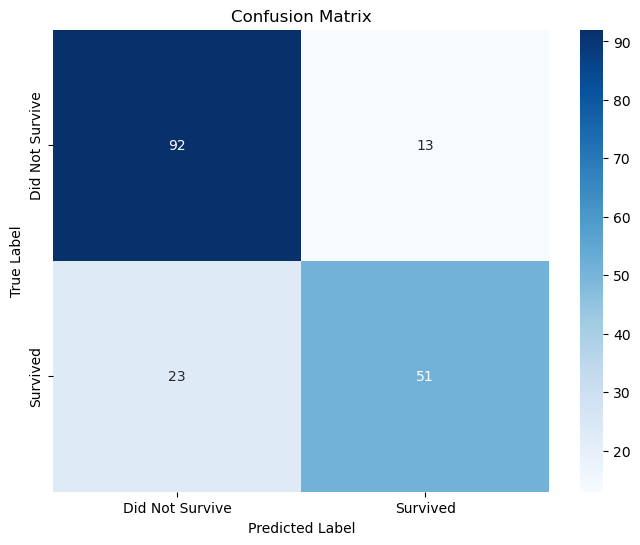

In [114]:
# use confusion matrix and classification report to evaluate the model and use seaborn for better visualization
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

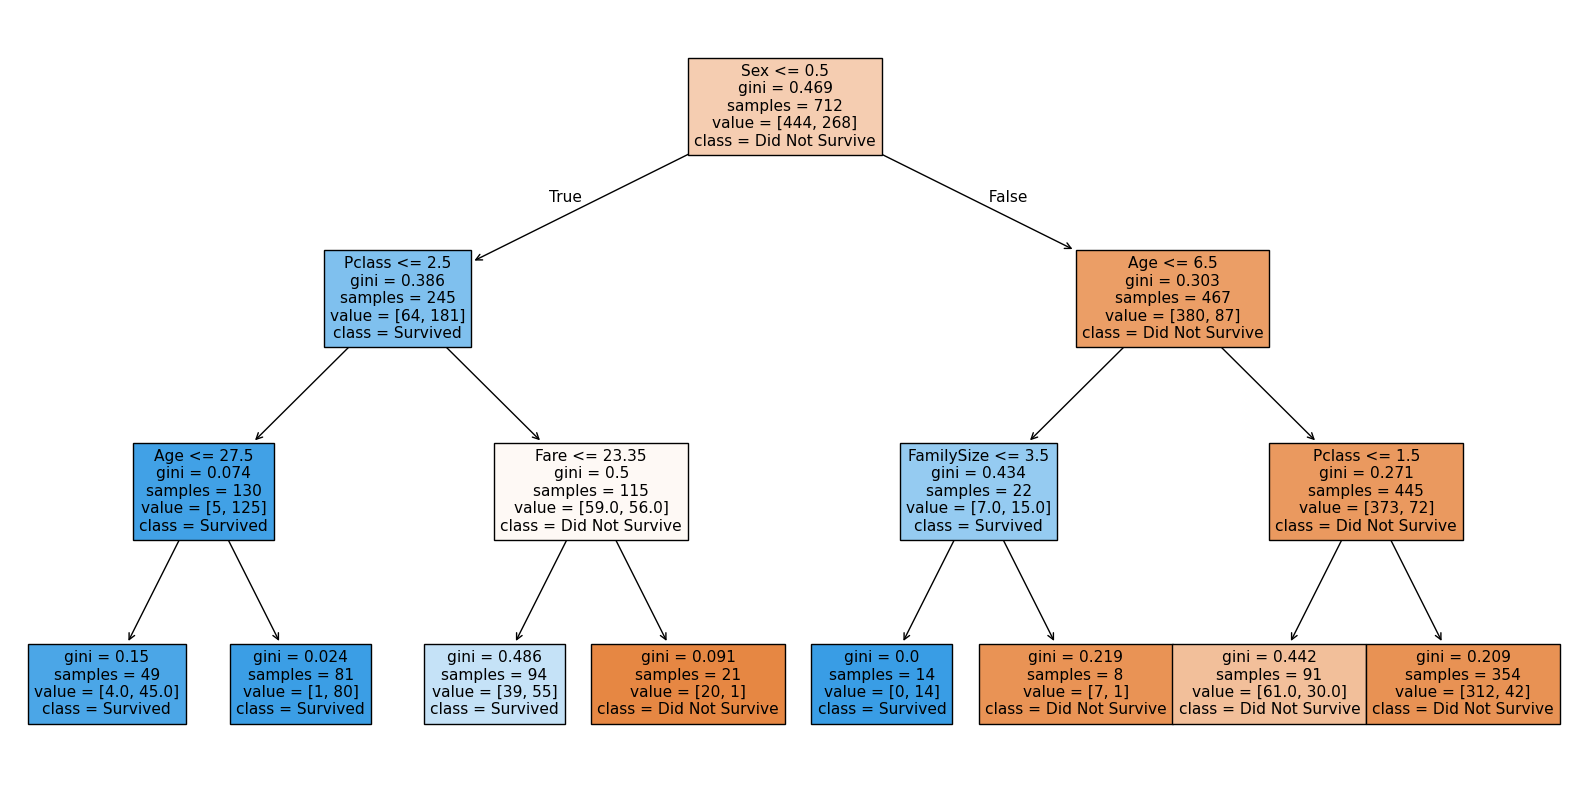

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, 
          max_depth=3) # Limit depth so it's readable
plt.show()

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Build 100 trees
    max_depth=5,           # Keep them somewhat shallow to avoid overfitting
    random_state=42
)

# Fit and Predict
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Check Accuracy
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.80
